# Polynomial Curve Fitting and Ill-conditioned Systems


In [12]:
#Import needed python libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import math 

#Parameter Settings
M = 10
u = 1
l = 0
N = 10
gVar = .15
load = 0.005;

#First, lets generate some simulated x- data.  
x = np.random.uniform(l,u,N)


Condition number of autocorrelation matrix: 3.32506370657e+18
Condition number of diagonally-loaded autocorrelation matrix: 4894.6531114
 
Eigenspectrum of autocorrelation matrix: [  2.44682656e+01   2.65804473e+00   2.53536239e-01   1.04820237e-02
   5.18811223e-04   1.48275500e-05   8.52005601e-08   2.80787672e-09
   6.00193612e-13   7.35873587e-18   1.92805780e-16]
 
Eigenspectrum of diagonally-loaded autocorrelation matrix: [  2.44732656e+01   2.66304473e+00   2.58536239e-01   1.54820237e-02
   5.51881122e-03   5.01482755e-03   5.00008520e-03   5.00000281e-03
   5.00000000e-03   5.00000000e-03   5.00000000e-03]


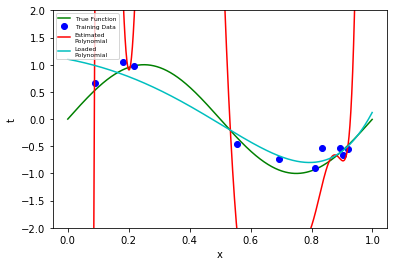

In [13]:
#Next, lets generate some noise
e = np.random.normal(0,gVar,N)

# Suppose the true function is a sine curve and add the noise
t = np.sin(2*math.pi*x) + e

#Then we can fit the data using the polynomial curve fitting method we derived
X = np.array([x**m for m in range(M+1)]).T
Z = X.T@X
Z_w = X.T@X + load*np.identity(X.shape[1])
w = np.linalg.inv(Z)@X.T@t
w_w = np.linalg.inv(Z_w)@X.T@t

#Now let us use the weights in test and plot results
xrange = np.arange(l,u,0.001)  #get equally spaced points in the xrange
y = np.sin(2*math.pi*xrange) #compute the true function value
X = np.array([xrange**m for m in range(w.size)]).T
esty = X@w #compute the predicted value
esty_w = X@w_w

#plot everything
fig = plt.figure();
ax = fig.gca();
p1 = plt.plot(xrange, y, 'g'); #plot true value
p2 = plt.plot(x, t, 'bo'); #plot training data
p3 = plt.plot(xrange, esty, 'r'); #plot estimated value
p4 = plt.plot(xrange, esty_w, 'c'); #plot estimated value

#add legend and axes labels
plt.ylabel('t'); #label x and y axes
plt.xlabel('x');
ax.set_ylim(-2, 2);
plt.rcParams["axes.titlesize"] = 10;
plt.legend((p1[0],p2[0],p3[0], p4[0]),('True Function', 'Training Data', 'Estimated\nPolynomial', 'Loaded\nPolynomial'), fontsize=6);

eZ, vZ = np.linalg.eig(Z)
eZ_w, vZ_w = np.linalg.eig(Z_w)

fig = plt.figure();

print('Condition number of autocorrelation matrix:',max(eZ)/min(eZ) ) 
print('Condition number of diagonally-loaded autocorrelation matrix:', max(eZ_w)/min(eZ_w))
print(' ')
print('Eigenspectrum of autocorrelation matrix:', eZ)
print(' ')
print('Eigenspectrum of diagonally-loaded autocorrelation matrix:', eZ_w)

# Curse of Dimensionality Illustrations

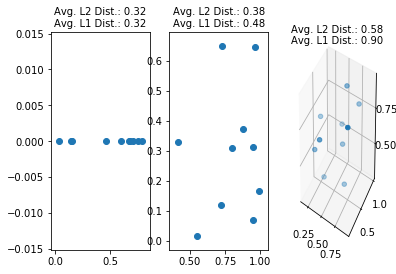

In [19]:
'''Illustrate that average distance between uniform random points increases when dimensionality
increases and number of data points held constant. Illustrates that you need more and more
points to characterize the unit cube as you go up in dimensionality.'''

from mpl_toolkits.mplot3d import Axes3D
import scipy.spatial.distance as sc 
import textwrap

x1 = np.random.uniform(0,1,(N,1)) #generate N uniform random data points in the unit interval
x2 = np.random.uniform(0,1,(N,2)) #generate N uniform random data points in the unit square
x3 = np.random.uniform(0,1,(N,3)) #generate N uniform random data points in the unit cube
y1 = np.mean(sc.pdist(x1, 'euclidean')) #compute avg euclidean distance between points
y2 = np.mean(sc.pdist(x2, 'euclidean'))
y3 = np.mean(sc.pdist(x3, 'euclidean'))
z1 = np.mean(sc.pdist(x1, 'cityblock')) #compute l1 distance between points
z2 = np.mean(sc.pdist(x2, 'cityblock'))
z3 = np.mean(sc.pdist(x3, 'cityblock'))

#plot results
fig = plt.figure()
ax = fig.add_subplot(*[1,3,1])
ax.scatter(x1, np.zeros((N,1)))
myTitle = 'Avg. L2 Dist.: ' + str("%.2f"%y1) + ' Avg. L1 Dist.: ' + str("%.2f"%z1);
ax.set_title("\n".join(textwrap.wrap(myTitle, 20)))

ax = fig.add_subplot(*[1,3,2])
ax.scatter(x2[:,0], x2[:,1]) 
myTitle = 'Avg. L2 Dist.: ' + str("%.2f"%y2) + ' Avg. L1 Dist.: ' + str("%.2f"%z2);
ax.set_title("\n".join(textwrap.wrap(myTitle, 20)))

ax = fig.add_subplot(*[1,3,3], projection='3d')
ax.scatter(x3[:,0], x3[:,1], x3[:,2]) 
myTitle = 'Avg. L2 Dist.: ' + str("%.2f"%y3) + ' Avg. L1 Dist.: ' + str("%.2f"%z3);
ax.set_title("\n".join(textwrap.wrap(myTitle, 20)))
plt.show();

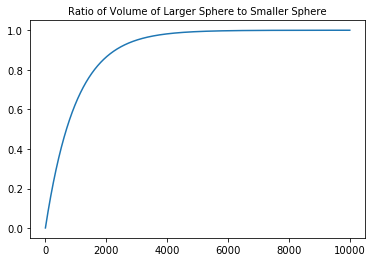

In [21]:
#Crust volume between spheres with epsilon different radii and increasing dimensionality
a = 1
eps = 0.001
D = np.arange(1,10000)
RatioVol = [1-(1-eps/a)**d for d in D]
fig = plt.figure()
plt.plot(D, RatioVol)
plt.title('Ratio of Volume of Larger Sphere to Smaller Sphere')
plt.show() 

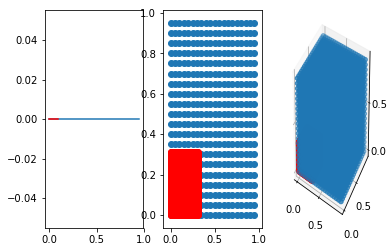

In [17]:
#Percentage Volume Illustration (p=.1)

p = 0.1
fig = plt.figure()
x = np.arange(0,1,.05)

# 1D 
ax = fig.add_subplot(*[1,3,1])
ax.plot(x, np.zeros(x.size))
z = np.arange(0,p,.01)
ax.plot(z, np.zeros(z.size), 'r')

# 2D 
ax = fig.add_subplot(*[1,3,2])
[xx,yy] = np.meshgrid(x,x)
z = np.arange(0,math.sqrt(p),0.01)
[zx,zy] = np.meshgrid(z,z)
ax.scatter(xx, yy)
ax.scatter(zx, zy, color='red')

# 3D 
ax = fig.add_subplot(*[1,3,3], projection='3d')
[xx,yy,zz] = np.meshgrid(x,x,x)
z = np.arange(0,math.sqrt(p),0.01)
[zx,zy,zz2] = np.meshgrid(z,z,z)
ax.scatter(xx, yy, zz)
ax.scatter(zx, zy, zz2, color='red')
plt.show()

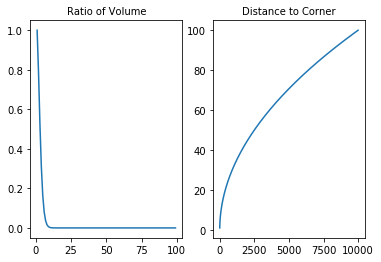

In [24]:
#The Unit Porcupine Plot
#The unit hyper-sphere inscribed within the unit hyper-cube.

fig = plt.figure()
d = range(1,100)
V = [math.pi**(i/2)/(2**i*math.gamma(i/2 + 1)) for i in d]
ax = fig.add_subplot(*[1,2,1])
ax.plot(d, V) 
ax.set_title('Ratio of Volume')

dCorner = [math.sqrt(d) for d in range(1,10000)]
ax = fig.add_subplot(*[1,2,2])
ax.plot(range(1,10000), dCorner) 
ax.set_title('Distance to Corner')

plt.show();